In [16]:
import data_preperation as dp
import pandas as pd
import numpy as np

Succesfully connected for uploading
Succesfully connected for uploading


# Data Exploration

## Basic statistics of both dataframes

In [3]:
data_hours = dp.raw_data_hours
data_days = dp.raw_data_days
print(data_hours.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))))
print(data_days.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))))

sourceid        dstid          hod mean_travel_time  \
count  7.06304e+06  7.06304e+06  7.06304e+06      7.06304e+06   
mean       74.5654      76.4813      11.6724          748.247   
std        44.2885      45.7742      7.20981          357.805   
min              1            1            0             2.71   
25%             38           40            5            486.5   
50%             67           68           12              724   
75%            109          111           18           975.75   
max            181          181           23          4431.67   

      standard_deviation_travel_time geometric_mean_travel_time  \
count                    7.06304e+06                7.06304e+06   
mean                         279.556                    699.375   
std                          147.536                    354.207   
min                             0.96                       2.52   
25%                           190.29                     438.83   
50%                   

## Data entries per year and hour
In the following figures we can see that the amount of data entries increases over the years.

year   2016   2017    2018    2019
hod                               
0     62817  88646  104686  112995
1     59712  85048  101001  109043
2     51497  74608   89883   97527
3     47134  69404   84868   93004
4     44495  65611   80800   89063
5     40506  58701   72770   81550
6     34330  51582   63929   70334
7     39017  56857   68740   75441
8     43500  61683   74769   81785
9     43801  62550   76350   83332
10    43745  62715   76092   83286
11    45255  64580   78428   87080
12    46459  66290   80716   88571
13    46807  66588   80794   87556
14    47851  68419   82423   89478
15    48080  68875   82909   90070
16    48351  69293   83394   90325
17    49563  71435   86769   93965
18    53021  75799   90420   96750
19    53161  74557   89333   95110
20    50928  71409   86051   92636
21    51668  72860   88084   94381
22    55856  79774   95152  102646
23    61511  87247  103610  111540


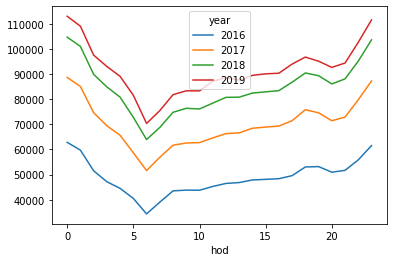

In [4]:
pd.crosstab(data_hours["hod"], data_hours["year"],).plot()
print(pd.crosstab(data_hours["hod"], data_hours["year"],))

## Mean Travel Time by area
The range in de mean_travel_time column is huge (from 2 to 4000). The graph below shows that there are some outliers in the data. I found out that there are some areas that have very little data entries. These areas should be left out of the analysis.

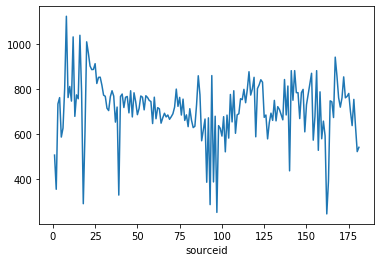

In [5]:
data_hours.groupby(["sourceid"]).mean()["mean_travel_time"].plot()

In [6]:
# which areas have and outstanding low mean?
grouped = data_hours.groupby(["dstid"]).mean()["mean_travel_time"]
print( grouped[grouped < 400])

# We zien dat er heel weinig data is vanuit 2. Is dat bij meer wijken het geval? Want dan kunnen we die misschien beter niet meenemen. Hetzelfde gelt voor wijken waar het gemiddelde bizar hoog ligt. Misschien alleen verder gaan met entries die binnen IQR vallen qua aantallen.
print(data_hours[data_hours["sourceid"] == 2 ])

dstid
2      362.300172
5      391.157921
6      391.324318
126    399.244052
140    366.505901
Name: mean_travel_time, dtype: float64
        sourceid  dstid  hod  mean_travel_time  \
115497         2      1   16            283.31   
126600         2    104   16            802.91   
137355         2    104   13            425.67   
174609         2    104   15            424.90   
197750         2    104   17            279.45   
12166          2    104   19            162.50   
39210          2    177   23            509.33   
124921         2    180   23            322.50   
256159         2    180    2            306.33   
233163         2    180   22            304.63   
263471         2    177    0            195.17   
271539         2    180    0            124.33   
272991         2    177   22            408.00   
28267          2    180    1            336.67   
38814          2    177   23            571.00   
108012         2    177    1            520.67   
123925         

In [8]:
# how many entries does each area have?
amountbysource = data_hours.groupby(["sourceid"]).count()["dstid"]
amountbydest = data_hours.groupby(["dstid"]).count()["sourceid"]
totalbyarea = amountbysource.add(amountbydest)

Q1 = np.percentile(totalbyarea, 25)

# this are the areas that have an amount of entries above and under the Q1. 
(totalbyarea[totalbyarea > Q1]).describe()
print((totalbyarea[totalbyarea < Q1]).describe())

totalbyarea.describe()

count       45.000000
mean     10754.533333
std       7417.771341
min         81.000000
25%       4928.000000
50%       9743.000000
75%      14915.000000
max      23752.000000
dtype: float64


count       178.000000
mean      79359.943820
std       54548.773521
min          81.000000
25%       23762.250000
50%       82131.000000
75%      127782.000000
max      177804.000000
dtype: float64

In [9]:
areaswekeep = (totalbyarea[totalbyarea > Q1].index)
print(areaswekeep)

# lets make a new dataframe without the areas that we too little data from

new_data_hours = data_hours[data_hours['sourceid'].isin(areaswekeep)]
new_data_hours = new_data_hours[new_data_hours['dstid'].isin(areaswekeep)]

Int64Index([  3,   4,   7,   8,   9,  10,  11,  12,  15,  16,
            ...
            166, 167, 168, 169, 171, 172, 173, 174, 175, 178],
           dtype='int64', name='sourceid', length=133)


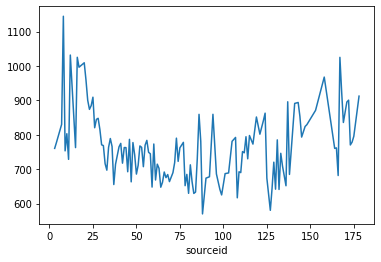

In [12]:
# stats are a lot more consistent now.
new_data_hours.groupby(["sourceid"]).mean()["mean_travel_time"].plot()

In [17]:
# tables with outliers removed
result = dp.result

In [15]:
result["daytime"].hist()

In [40]:
joe = pd.crosstab(result["daytime"], result["sourceid"],)

## Visualise busyness

In [5]:
# example of comparing busyness between two areas
centrum = result[result["sourceid"] == 24]
centrum.groupby(["daytime"]).mean()["busyness"].plot()
buitenwijk = result[result["sourceid"] == 124]
buitenwijk.groupby(["daytime"]).mean()["busyness"].plot()

## More nice plots

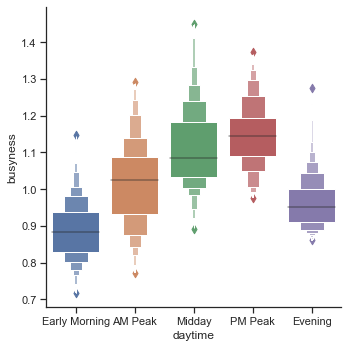

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

centrumV = result[result["sourceid"] == 24]
centrumV = centrumV[centrumV["dstid"] == 8]

sns.set(style="ticks", color_codes=True)

sns.catplot(x="daytime", y="busyness", kind="swarm", hue="weekend", order=["Early Morning", "AM Peak", "Midday", "PM Peak", "Evening"], data=centrumV)
sns.catplot(x="daytime", y="busyness", kind="boxen", order=["Early Morning", "AM Peak", "Midday", "PM Peak", "Evening"] ,data=centrumV)